## 1. Import Libraries

In [27]:
import numpy as np 

import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Daata

In [5]:
file_path = r"C:\Users\vaibh\OneDrive\Desktop\Flight_Sagemaker_Project\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-01,Delhi,Cochin,05:35:00,08:50:00,195,0.0,No Info,6541
1,Jet Airways,2019-05-27,Delhi,Cochin,09:00:00,19:00:00,600,1.0,In-flight meal not included,10675
2,Jet Airways,2019-03-27,Delhi,Cochin,11:30:00,18:50:00,440,1.0,No Info,12242
3,Jet Airways,2019-06-24,Delhi,Cochin,13:00:00,04:25:00,925,1.0,In-flight meal not included,10262
4,Jet Airways,2019-03-24,Kolkata,Banglore,16:55:00,19:40:00,1605,1.0,In-flight meal not included,11134
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-06-12,Delhi,Cochin,08:45:00,13:15:00,270,1.0,No check-in baggage included,5158
636,Air India,2019-03-03,Delhi,Cochin,21:30:00,19:15:00,1305,2.0,No Info,12497
637,Jet Airways,2019-06-27,Delhi,Cochin,20:55:00,04:25:00,450,1.0,In-flight meal not included,12898
638,Air India,2019-05-15,Delhi,Cochin,05:15:00,06:50:00,1535,1.0,No Info,8425


In [6]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [14]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [15]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### 3. High-Level Summary of Data

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [18]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,651.859375,0.812500,9045.723438
std,512.181406,0.658993,4515.356829
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5403.000000
50%,550.000000,1.000000,8452.000000
75%,956.250000,1.000000,12242.000000
max,2315.000000,3.000000,54826.000000


In [21]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="object")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,234,252,252,343.0,493


## 4. High-level analysis of missing values

## 5. High-leval analysis of outliers

In [23]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [25]:
(
    train
    .assign(outlier=forest.fit_predict(train
    .drop(columns="price")
    .select_dtypes(include="number")))

    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Indigo,2019-06-01,Delhi,Cochin,2024-06-09 05:35:00,2024-06-09 08:50:00,195,0.0,No Info,6541,-1
2,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-09 11:30:00,2024-06-09 18:50:00,440,1.0,No Info,12242,-1
4,Jet Airways,2019-03-24,Kolkata,Banglore,2024-06-09 16:55:00,2024-06-09 19:40:00,1605,1.0,In-flight meal not included,11134,-1
7,Multiple Carriers,2019-03-09,Delhi,Cochin,2024-06-09 17:50:00,2024-06-09 01:35:00,465,2.0,No Info,23583,-1
13,Jet Airways,2019-05-24,Banglore,Delhi,2024-06-09 08:20:00,2024-06-09 11:20:00,180,0.0,In-flight meal not included,4030,-1
...,...,...,...,...,...,...,...,...,...,...,...
633,Multiple Carriers,2019-06-15,Delhi,Cochin,2024-06-09 15:05:00,2024-06-09 01:30:00,625,2.0,No Info,15965,-1
635,Spicejet,2019-06-12,Delhi,Cochin,2024-06-09 08:45:00,2024-06-09 13:15:00,270,1.0,No check-in baggage included,5158,-1
636,Air India,2019-03-03,Delhi,Cochin,2024-06-09 21:30:00,2024-06-09 19:15:00,1305,2.0,No Info,12497,-1
637,Jet Airways,2019-06-27,Delhi,Cochin,2024-06-09 20:55:00,2024-06-09 04:25:00,450,1.0,In-flight meal not included,12898,-1


## 6. Pair Plots

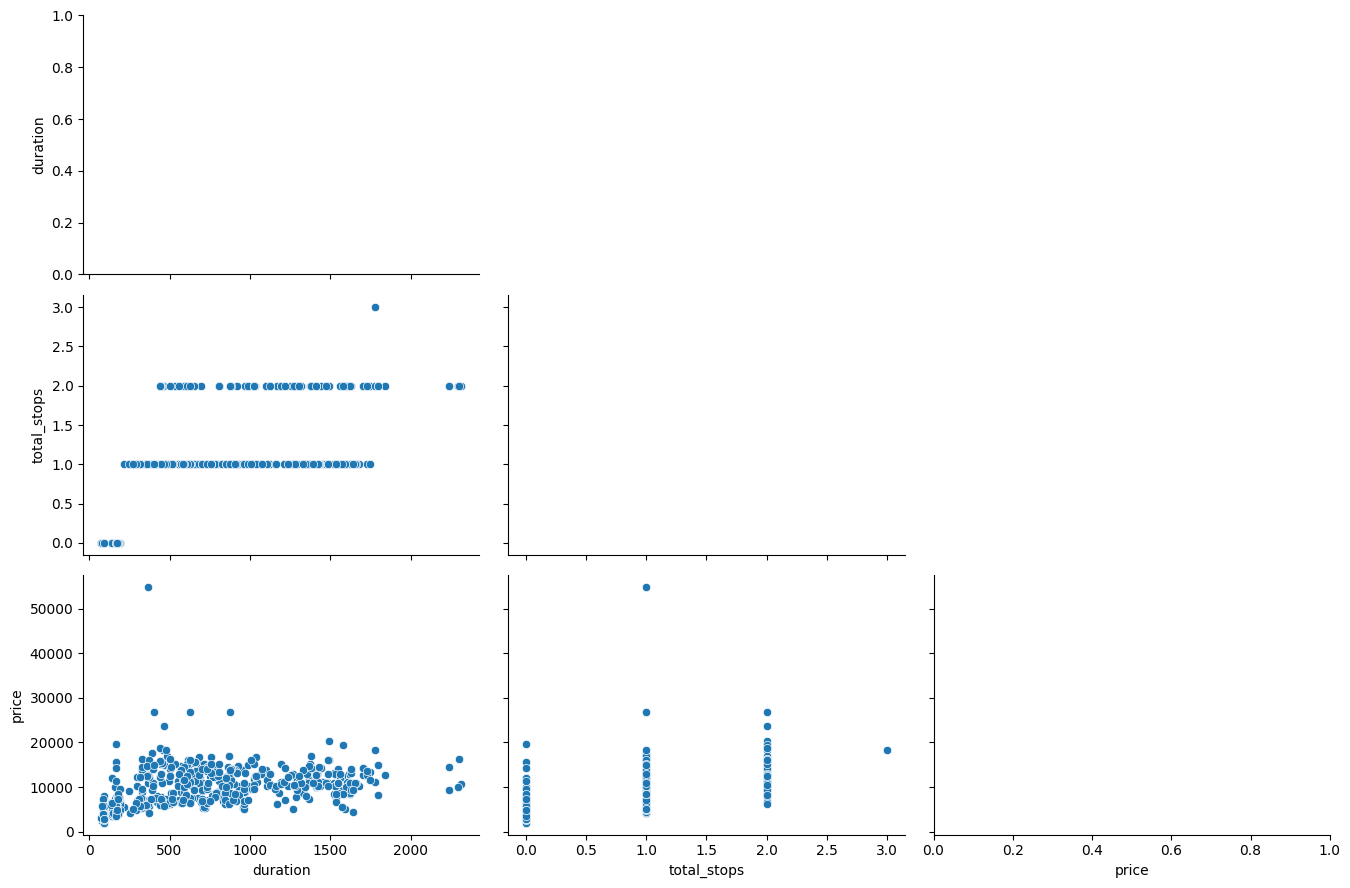

In [28]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

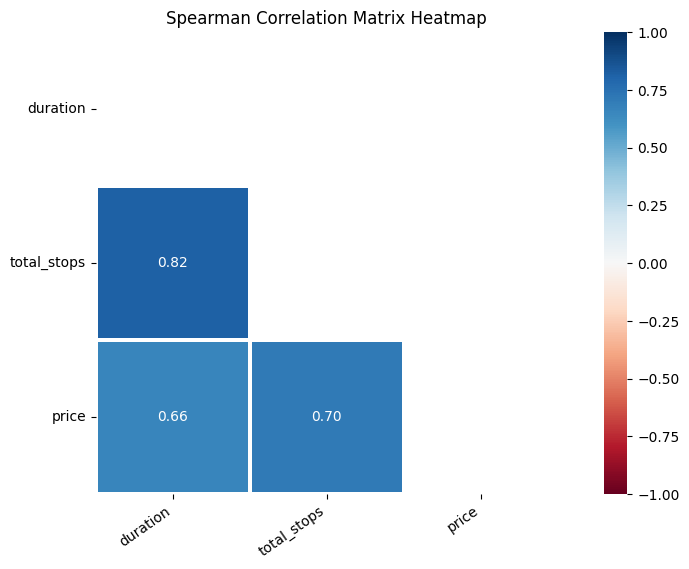

In [29]:
eda_helper_functions.correlation_heatmap(train)

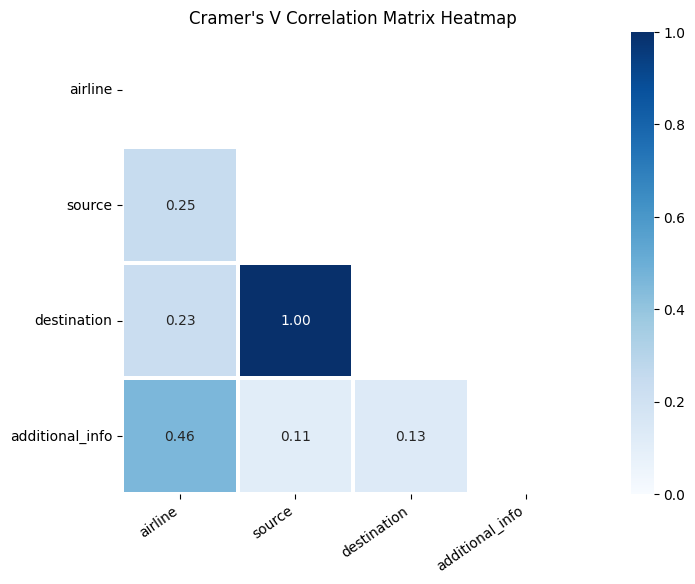

In [30]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis of each Feature:

In [31]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [32]:
train.airline

0           Indigo
1      Jet Airways
2      Jet Airways
3      Jet Airways
4      Jet Airways
          ...     
635       Spicejet
636      Air India
637    Jet Airways
638      Air India
639         Indigo
Name: airline, Length: 640, dtype: object

In [33]:
eda_helper_functions.cat_summary(train,"airline")

0           Indigo
1      Jet Airways
2      Jet Airways
3      Jet Airways
4      Jet Airways
          ...     
635       Spicejet
636      Air India
637    Jet Airways
638      Air India
639         Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,234


,count,percentage
category,,
Jet Airways,234,0.365625
Indigo,116,0.181250
Air India,112,0.175000
Multiple Carriers,63,0.098437
Spicejet,45,0.070312
Vistara,37,0.057813
Air Asia,25,0.039062
Goair,8,0.012500


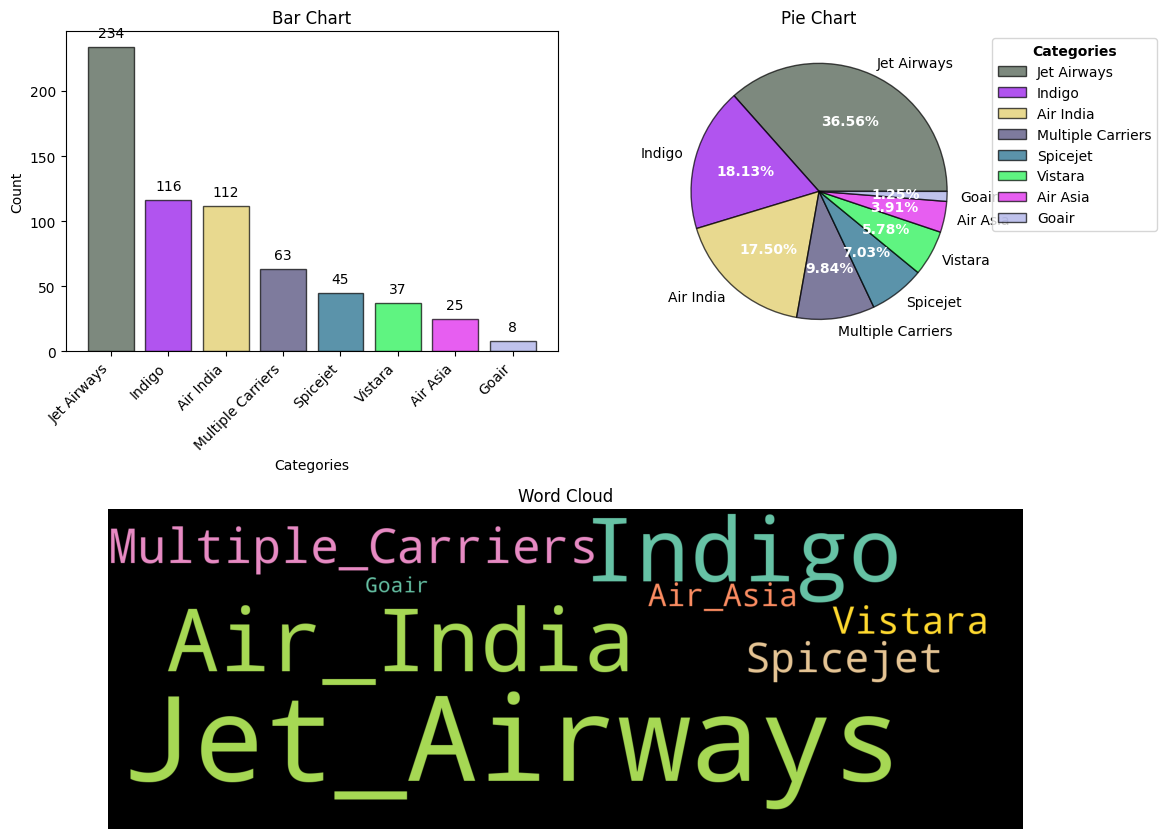

In [34]:
eda_helper_functions.cat_univar_plots(train, "airline")

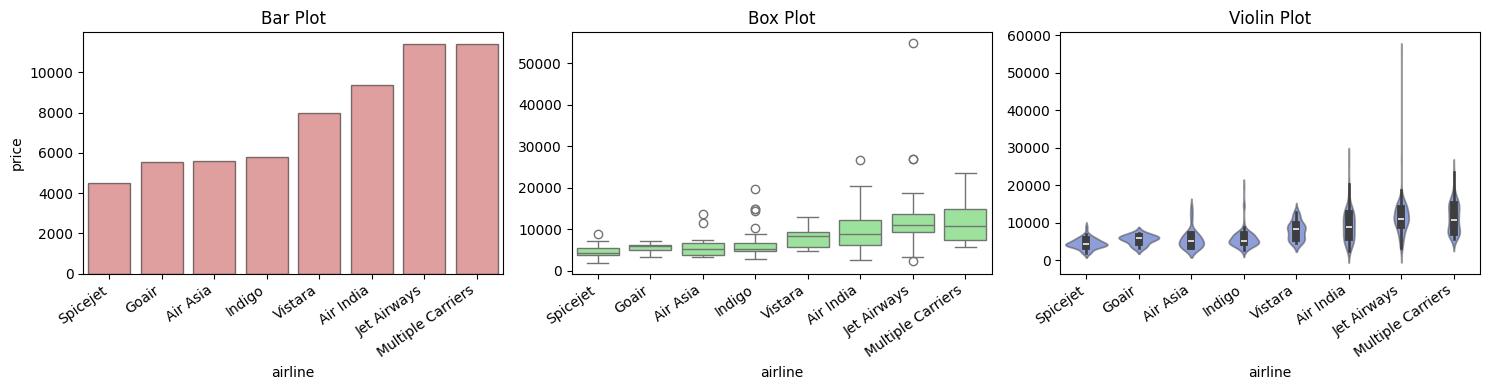

In [35]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [36]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 43.77322880172474
- p-value              : 1.8864218591441562e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 275.960852383153
- p-value              : 8.160418659919983e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


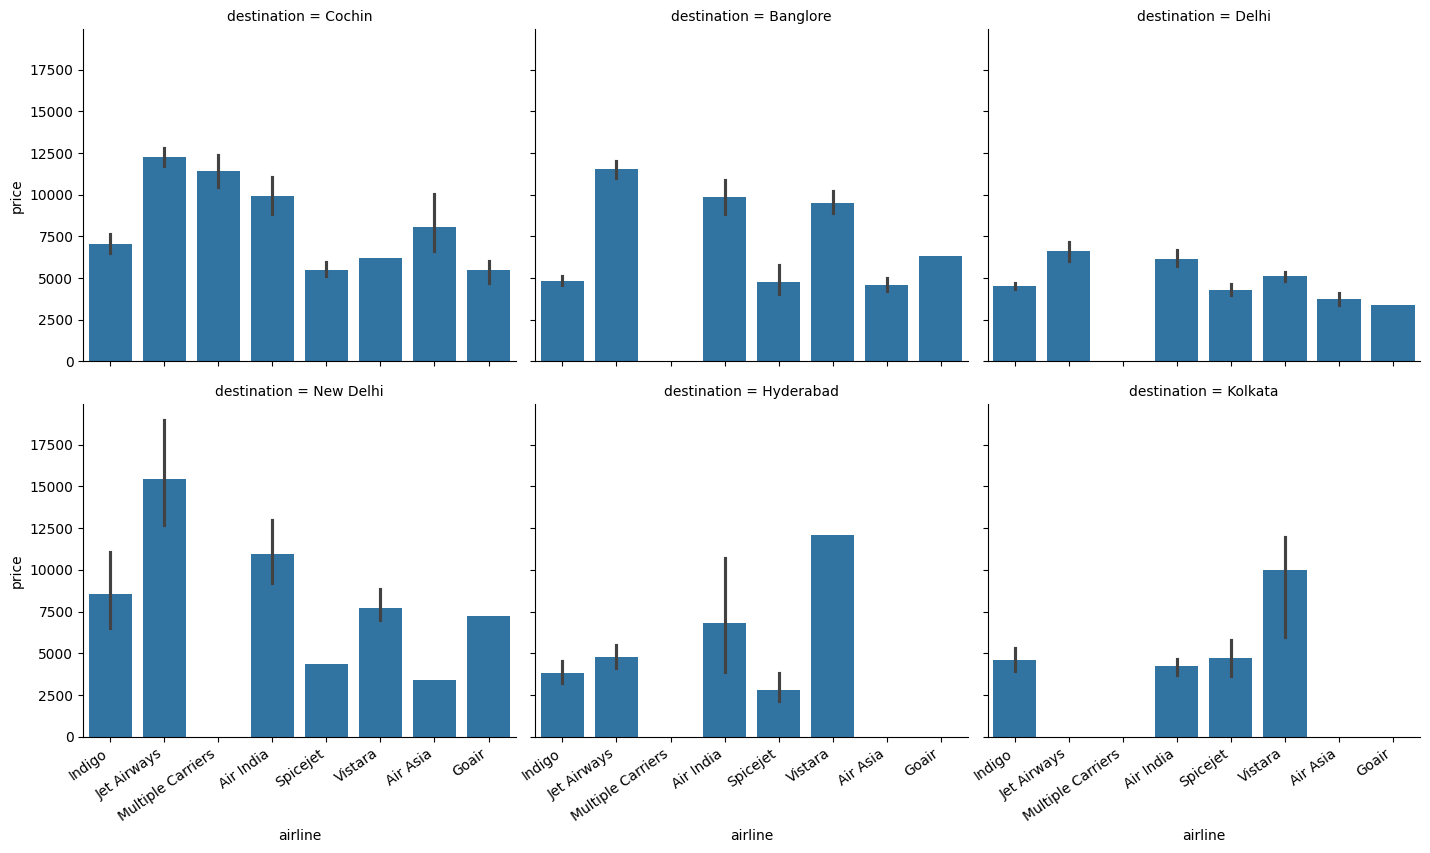

In [42]:
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    col_wrap = 3,
    height = 4,
    aspect = 1.2,
    sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey 

In [43]:
train.date_of_journey

0     2019-06-01
1     2019-05-27
2     2019-03-27
3     2019-06-24
4     2019-03-24
         ...    
635   2019-06-12
636   2019-03-03
637   2019-06-27
638   2019-05-15
639   2019-03-03
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

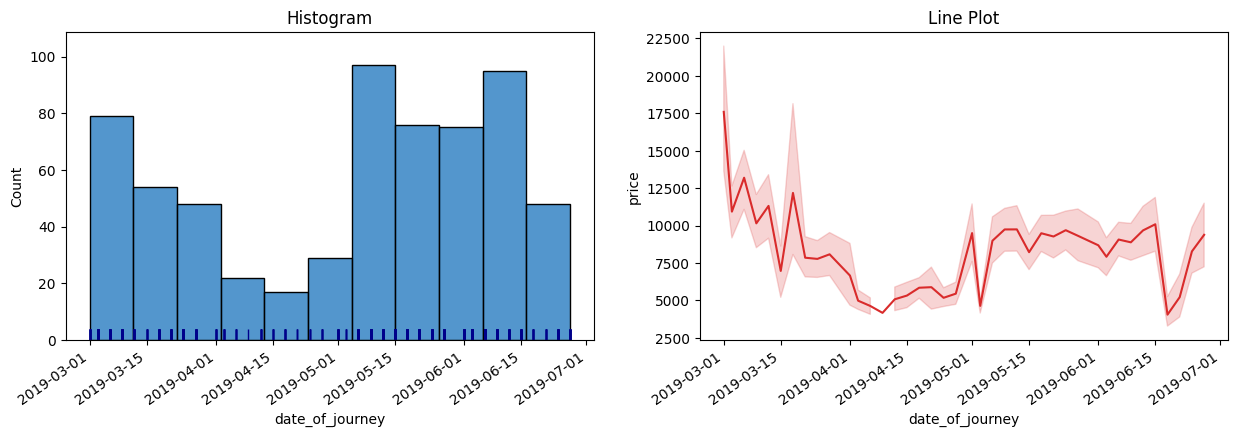

In [45]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

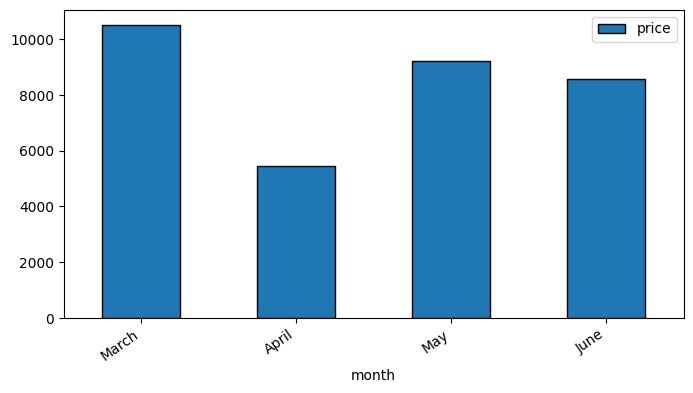

In [48]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

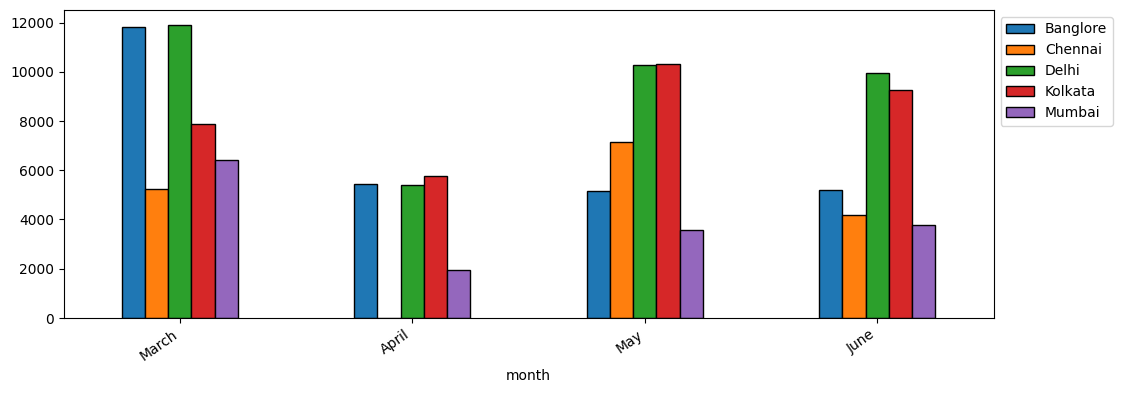

In [50]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [51]:
train.dep_time

0     2024-06-09 05:35:00
1     2024-06-09 09:00:00
2     2024-06-09 11:30:00
3     2024-06-09 13:00:00
4     2024-06-09 16:55:00
              ...        
635   2024-06-09 08:45:00
636   2024-06-09 21:30:00
637   2024-06-09 20:55:00
638   2024-06-09 05:15:00
639   2024-06-09 04:45:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

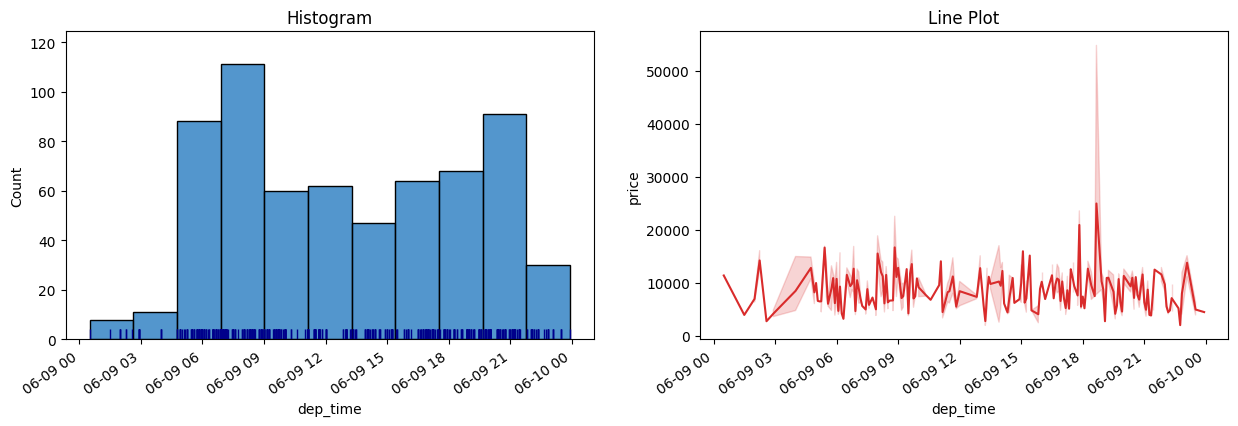

In [52]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

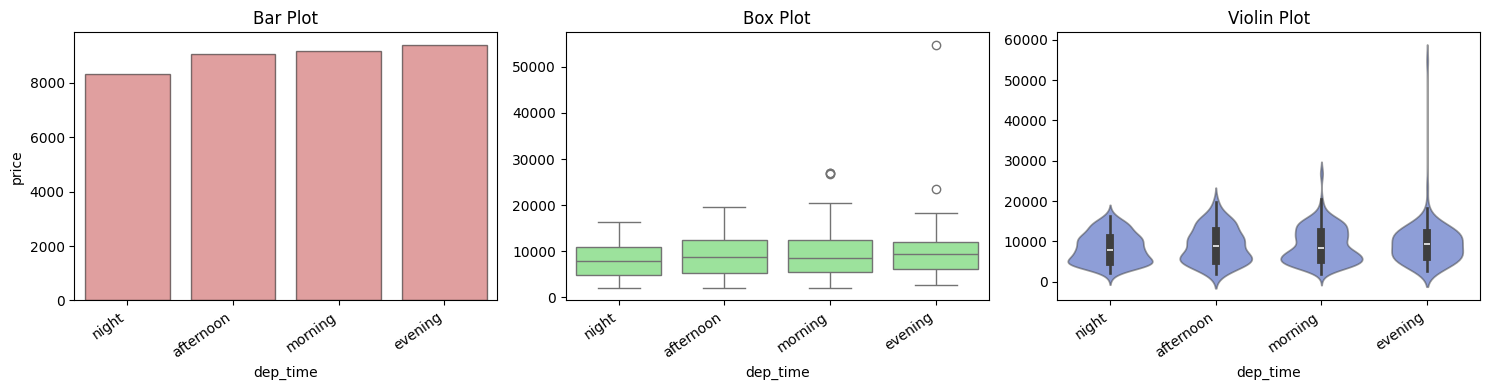

In [53]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 Duration

In [54]:
eda_helper_functions.num_summary(train,"duration")

0       195
1       600
2       440
3       925
4      1605
       ... 
635     270
636    1305
637     450
638    1535
639     405
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,150.00
25,175.00
50,550.00
75,956.25
90,1490.00
95,1615.25
99,1795.00


,value
mean,651.859375
trimmed mean (5%),620.598958
trimmed mean (10%),592.949219
median,550.000000


,value
var,262329.792400
std,512.181406
IQR,781.250000
mad,380.000000
coef_variance,0.785724


,value
skewness,0.822666
kurtosis,-0.275094


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.991241425105415e-21
Test Statistic       : 0.8891555063506752
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.30087038648628
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


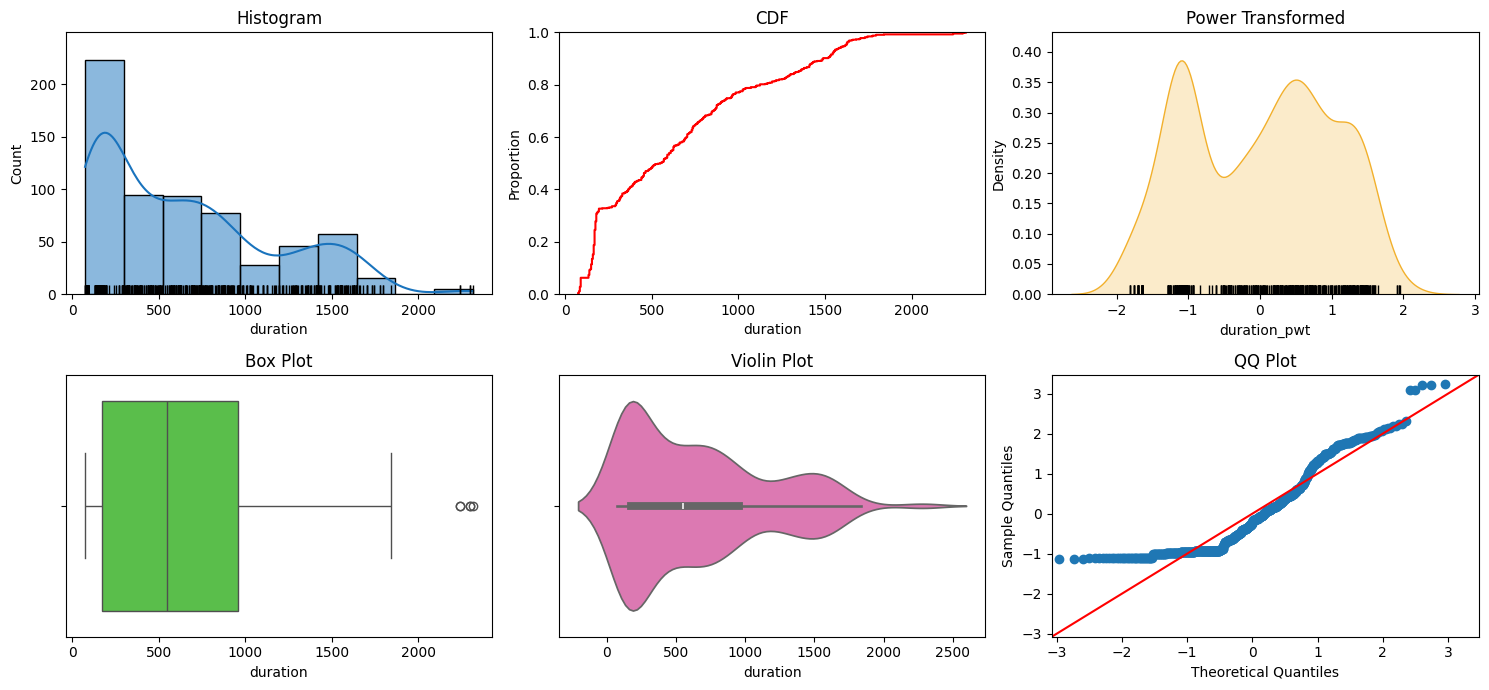

In [55]:
eda_helper_functions.num_univar_plots(train,"duration")

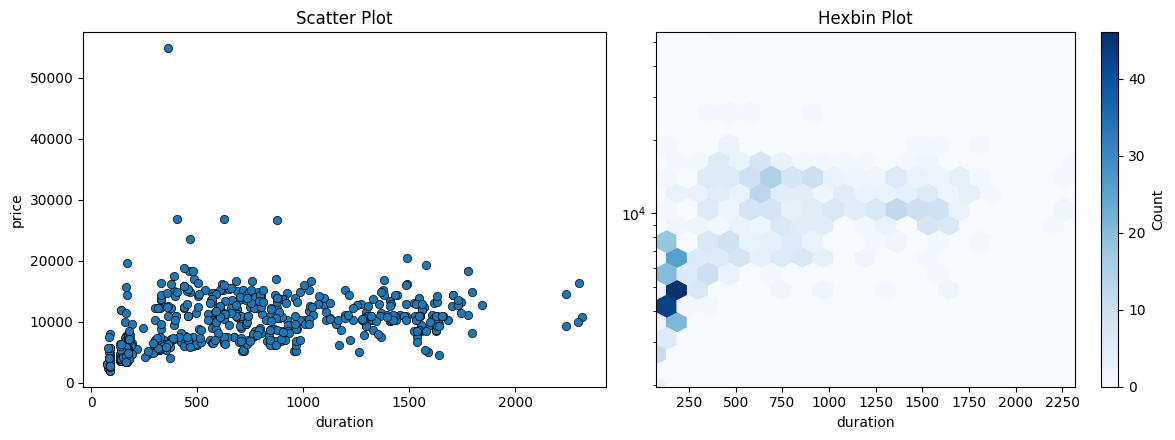

In [56]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [57]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4588181741581213
- p-value              : 1.2247960835717985e-34
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6621470273750519
- p-value              : 5.435521414528688e-82
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


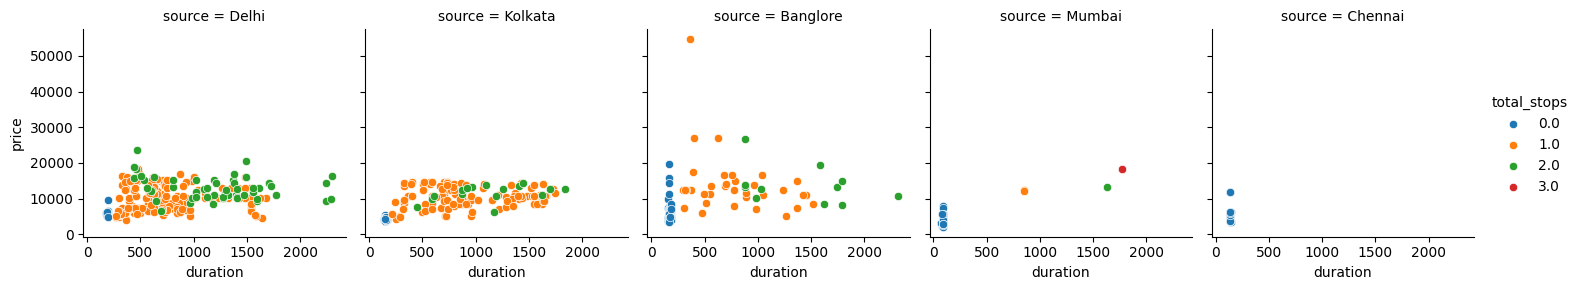

In [58]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [60]:
eda_helper_functions.get_iqr_outliers(train, "duration")


Lower Limit : -996.875
Upper Limit : 2128.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
108,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-09 05:30:00,2024-06-09 18:50:00,2240,2.0,In-flight meal not included,9328
184,Air India,2019-03-09,Delhi,Cochin,2024-06-09 05:55:00,2024-06-09 19:15:00,2240,2.0,No Info,14483
523,Air India,2019-06-09,Delhi,Cochin,2024-06-09 05:00:00,2024-06-09 19:15:00,2295,2.0,No Info,9968
585,Jet Airways,2019-03-06,Delhi,Cochin,2024-06-09 05:25:00,2024-06-09 19:45:00,2300,2.0,In-flight meal not included,16389
232,Air India,2019-03-18,Banglore,New Delhi,2024-06-09 08:50:00,2024-06-09 23:25:00,2315,2.0,No Info,10783


### 8.5 additional_info

In [61]:
eda_helper_functions.cat_summary(train, "additional_info")


0                           No Info
1       In-flight meal not included
2                           No Info
3       In-flight meal not included
4       In-flight meal not included
                   ...             
635    No check-in baggage included
636                         No Info
637     In-flight meal not included
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,493


,count,percentage
category,,
No Info,493,0.770312
In-flight meal not included,134,0.209375
No check-in baggage included,12,0.018750
1 Short layover,1,0.001563


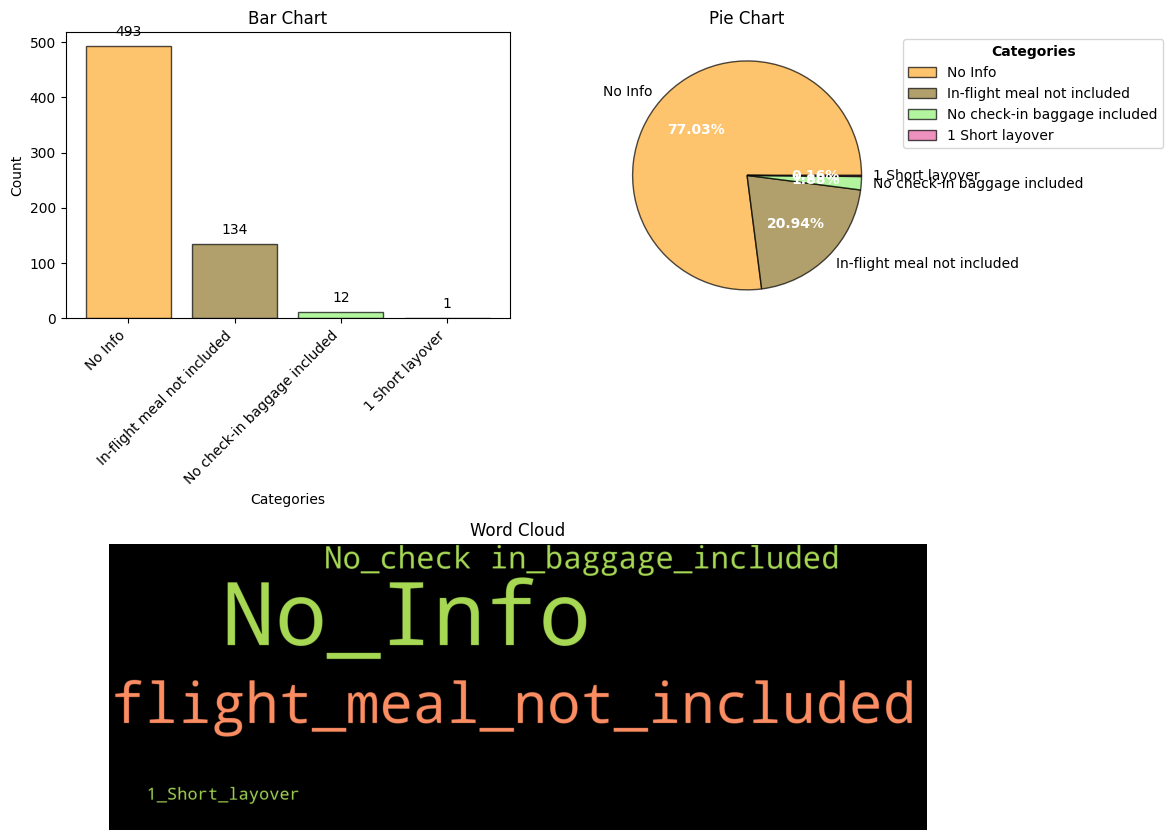

In [62]:
eda_helper_functions.cat_univar_plots(train, "additional_info")


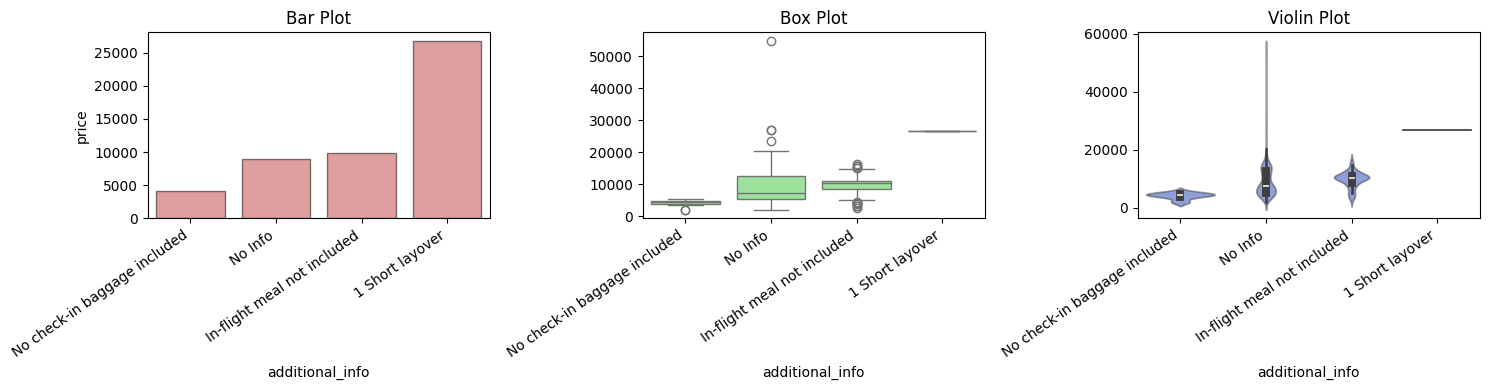

In [63]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")


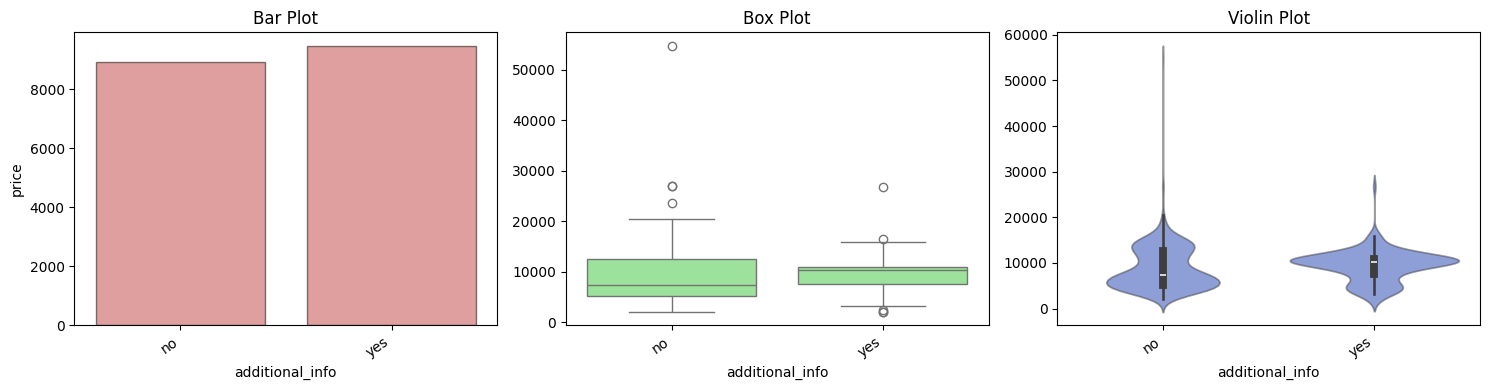

In [64]:
(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

## 9. Automated EDA

In [59]:
#from ydata_profiling import ProfileReport


ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
# report = ProfileReport(train)


In [ ]:
# report.to_file(output_file="output.html")
